In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [2]:
df = pd.read_csv('honeyproduction.csv', low_memory=False)

In [3]:
print(df.head())

  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  


In [4]:
#find the mean of totalprod per year
prod_per_year = df.groupby('year').totalprod.mean().reset_index()

In [5]:
#Create a variable called X that is the column of years in this prod_per_year DataFrame. 
X = prod_per_year["year"]

In [6]:
#Reshape X to get it into the right format. 
X = X.values.reshape(-1,1)

In [7]:
#Create a variable called y that is the totalprod column in the prod_per_year dataset.
y = prod_per_year["totalprod"]

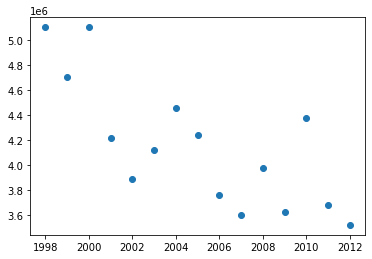

In [8]:
#plot y vs X as a scatterplot to find a linear relationship
plt.scatter(X,y)
plt.show()

In [9]:
#Create and Fit a Linear REgression Model
regr = linear_model.LinearRegression()

In [10]:
#fit the model to the data
regr.fit(X, y)

LinearRegression()

In [11]:
#print out the slope of the line
print(regr.coef_[0])
print(regr.intercept_)

-88303.18915238195
181208083.10732982


In [12]:
#Create a list called y_predict that is the predictions your regr model would make on the X data.
y_predict = regr.predict(X)
y_predict

array([4778311.18087068, 4690007.99171829, 4601704.8025659 ,
       4513401.61341354, 4425098.42426115, 4336795.23510876,
       4248492.04595637, 4160188.85680401, 4071885.66765162,
       3983582.47849923, 3895279.28934687, 3806976.10019448,
       3718672.91104209, 3630369.7218897 , 3542066.53273734])

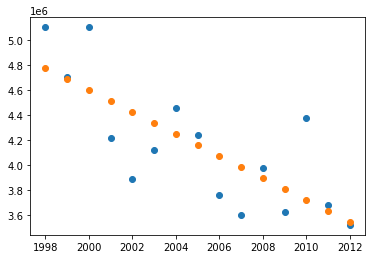

In [13]:
#Plot y_predict vs X as a line on top of the scatterplot
plt.scatter(X, y)
plt.scatter(X, y_predict)
plt.show()

In [14]:
#Create a NumPy array called X_future that is the range from 2013 to 2050.
X_future = np.array(range(2013, 2050))

In [15]:
#Reshape the array. 
X_future = X_future.reshape(-1, 1)

In [16]:
#Create a list called future_predict that is the y_values that the regr model would predict for the values of X_future.
future_predict = regr.predict(X_future)

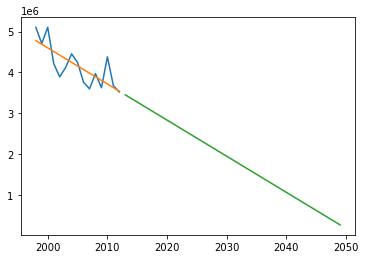

In [17]:
#Plot future_predict vs X_future on a different plot. 
plt.plot(X,y)
plt.plot(X, y_predict)
plt.plot(X_future, future_predict)
plt.show()